In [1]:
import os
import re
import xlrd
import pandas as pd
import numpy as np
import sys
#import gensim
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import PorterStemmer, WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
import time
from scipy.stats import randint as sp_randint
# machine learning
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
import scipy.stats as st
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition, pipeline, metrics, grid_search
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
import random
from sklearn import cross_validation
from sklearn.utils import shuffle


random.seed(9001)

porter_stemmer = PorterStemmer()
stemmer = SnowballStemmer("english")
stop_words = stopwords.words('english')

t0 = time.time()


os.chdir('C:\\Users\\swaroop\\Desktop\\interviews\\quantiphi')

C:\Users\swaroop\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\swaroop\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
# Read the data from excel to a pandas dataframe 
xl = pd.ExcelFile("omdb_v2.xlsx")

omdb = xl.parse(xl.sheet_names[0])
#print train.head()

train_excel = pd.ExcelFile("Training Sheet.xlsx")
scoring_excel = pd.ExcelFile("Scoring Sheet.xlsx")

train_data = train_excel.parse(train_excel.sheet_names[0])
scoring_data = scoring_excel.parse(scoring_excel.sheet_names[0])

train_data = train_data.drop(['genre', 'total'], axis=1)


In [3]:
print omdb.shape
omdb = omdb[omdb.data_length == 34]
print omdb.shape

omdb = omdb.drop(['language' ], axis=1)

train = pd.merge(omdb, train_data, on='id', how='inner')

print train_data.shape

print train.shape

train = train.drop(['id', 'rated', 'title', 'name_dummy', 'data_length', 'metascore', 'tomato_rating', 'tomato_meter', 'tomato_rotten', 'tomato_consensus', 'tomato_user_meter', 'tomato_fresh', 'imdb_votes', 'type','tomato_user_reviews','website','poster','imdb_id', 'tomato_reviews', 'awards', 'tomato_user_rating', 'dvd','imdb_rating','country','tomato_image', 'box_office', 'response' ], axis=1)

print train.shape

print train.columns

(1287, 38)
(1160, 38)
(1196, 13)
(1096, 49)
(1096, 22)
Index([                              u'year',
                                     u'plot',
                                   u'writer',
                               u'production',
                                   u'actors',
                                 u'director',
                                 u'released',
                                    u'genre',
                                  u'runtime',
                              u'Unnamed: 37',
                                     u'name',
                             u'display_name',
                          u'production_year',
                             u'movie_sequel',
                            u'creative_type',
                                   u'source',
                        u'production_method',
                                 u'language',
                      u'board_rating_reason',
          u'movie_board_rating_display_name',
       u'movie_release_pa

In [4]:

# Extract features out of actor and writer and director
def clean_text(row):
    # return the list of decoded cell in the Series instead 
    return row.decode('unicode_escape').encode('ascii', 'ignore')



for index, row in train.iterrows():
    if isinstance(row['actors'], float) or isinstance(row['actors'], int): 
        ifor_val = re.sub("[\(\[].*?[\)\]]", "", str(row['actors']).encode('utf-8'))
    else:
        ifor_val =  re.sub("[\(\[].*?[\)\]]", "", str(row['actors'].encode('utf-8')))
    train.set_value(index,'actors',ifor_val) 
        
    if isinstance(row['writer'], float) or isinstance(row['writer'], int): 
        ifor_val = re.sub("[\(\[].*?[\)\]]", "", str(row['writer']).encode('utf-8')).lower()
    else:
        ifor_val =  re.sub("[\(\[].*?[\)\]]", "", str(row['writer'].encode('utf-8'))).lower()
    train.set_value(index,'writer',ifor_val) 
        
    ifor_val = str(row['runtime']).replace('min', '').strip()
    
    train.set_value(index,'runtime',ifor_val)
    
    if isinstance(row['plot'], float) or isinstance(row['plot'], int): 
        ifor_val = clean_text(str(row['plot']).encode('utf-8'))
    else:
        ifor_val =  clean_text(row['plot'].encode('utf-8'))
    train.set_value(index,'plot',ifor_val) 
    

print train['writer'].head(10)

actor_dummies_train = train['actors'].str.get_dummies(sep=',')

print(actor_dummies_train.shape)

actor_dummies_train.drop([col for col, val in actor_dummies_train.sum().iteritems() if val < 3], axis=1, inplace=True)

print actor_dummies_train.shape


writer_dummies_train = train['writer'].str.get_dummies(sep=',')

print(writer_dummies_train.shape)

writer_dummies_train.drop([col for col, val in writer_dummies_train.sum().iteritems() if val < 3], axis=1, inplace=True)

print writer_dummies_train.shape

0                                        james cameron
1                                         ehren kruger
2    john lasseter , andrew stanton , lee unkrich ,...
3    ted elliott , terry rossio , ted elliott , ter...
4                    linda woolverton , lewis carroll 
5    jonathan nolan , christopher nolan , christoph...
6    ted elliott, terry rossio, ted elliott , terry...
7                   michael goldenberg , j.k. rowling 
8                         steve kloves , j.k. rowling 
9    sam raimi , ivan raimi , alvin sargent , sam r...
Name: writer, dtype: object
(1096, 2957)
(1096, 335)
(1096, 2447)
(1096, 56)


In [5]:
# director
director_dummies_train = train['director'].str.get_dummies(sep=',')

print(director_dummies_train.shape)

director_dummies_train.drop([col for col, val in director_dummies_train.sum().iteritems() if val < 3], axis=1, inplace=True)

print director_dummies_train.shape

#runtime

#train['runtime'] = train['runtime'].str.replace(' min', '').astype(float)

#production

production_dummies_train =  train['production'].str.get_dummies(sep=',') 


(1096, 922)
(1096, 52)


In [6]:
#released date, day and weekday etc.   

train['release_day'] = pd.DatetimeIndex(train['released']).day
train['release_month'] = pd.DatetimeIndex(train['released']).month

train['relase_dayofweek'] = pd.DatetimeIndex(train['released']).dayofweek
#train['relase_weekofyear'] = pd.weekofyear(train['released']).weekofyear

release_day_dummies_train  = pd.get_dummies(train['release_day'], prefix='release_day_')

release_month_dummies_train  = pd.get_dummies(train['release_month'], prefix='release_month_')

relase_dayofweek_dummies_train  = pd.get_dummies(train['relase_dayofweek'], prefix='release_dayofweek_')

train = train.drop(['release_day', 'release_month', 'relase_dayofweek',], axis=1)
train = pd.concat([train, release_day_dummies_train, release_month_dummies_train, relase_dayofweek_dummies_train], axis=1)



In [7]:
#Create features for the dataset

train['same_name_flag'] = train['name'] == train['display_name']

train['contains_year2'] = train["name"].apply(lambda x: 1 if '(' in str(x) else 0)


train['same_name_flag']  = train['same_name_flag'].astype(int)

train['name_length'] = train["name"].apply(lambda x: len(str(x)))

train['name_words_len'] = train["name"].apply(lambda x: len(str(x).strip().split()))
    

In [8]:
#Create more features for the dataset

train['board_rating_reason'] = train['board_rating_reason'].str.replace(',','').replace('.','').replace('/',' ').replace(';','').replace('(','').replace(')','')
train['board_rating_reason'] = train['board_rating_reason'].str.lower()

stop = stopwords.words('english')

train['board_rating_reason'] = train['board_rating_reason'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

train['name'] = train['name'].str.replace(',','').replace('.','').replace('/',' ').replace(';','').replace('(','').replace(')','')
train['name'] = train['name'].str.lower()

train['name_wno_sw'] = train['name'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop)]))

train['name_wno_sw_length'] = train["name_wno_sw"].apply(lambda x: len(str(x)))
train['name_words_wno_sw_len'] = train["name_wno_sw"].apply(lambda x: len(str(x).strip().split()))


train['brr_TOKENIZED']=train['board_rating_reason'].apply(lambda x : filter(None,x.split(" ")))
train['brr_stemmed']=train['brr_TOKENIZED'].apply(lambda x : [porter_stemmer.stem(y) for y in x])
train['brr_stemmed_sentence']=train['brr_stemmed'].apply(lambda x : " ".join(x))


print train['brr_stemmed_sentence'][:5]

train = train.drop(['name_wno_sw', 'brr_TOKENIZED', 'brr_stemmed', 'board_rating_reason',], axis=1)


0    intens epic battl sequenc warfar sensual langu...
1    intens prolong sequenc sci-fi action violenc m...
2                                                gener
3    intens sequenc action/adventur violenc frighte...
4    fantasi action/viol involv scari imag situat s...
Name: brr_stemmed_sentence, dtype: object


In [9]:
#Features for the plot. I am assuming this information would be available before the release of the movie

train['plot'] = train['plot'].str.replace(',','').replace('.','').replace('/',' ').replace(';','').replace('(','').replace(')','')
train['plot'] = train['plot'].str.lower()

train['plot'] = train['plot'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop)]))

train['plot_TOKENIZED']=train['plot'].apply(lambda x : filter(None,x.split(" ")))
train['plot_stemmed']=train['plot_TOKENIZED'].apply(lambda x : [porter_stemmer.stem(y) for y in x])
train['plot_stemmed_sentence']=train['plot_stemmed'].apply(lambda x : " ".join(x))

plot_tf_vectorizer = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 5), use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')

train_plot_fit = plot_tf_vectorizer.fit_transform(train.plot_stemmed_sentence)

train_plot_final = pd.DataFrame(train_plot_fit.todense(), columns=plot_tf_vectorizer.get_feature_names())

train_plot_final.columns = ['plot_' + str(col)  for col in train_plot_final.columns]

train = train.drop(['plot', 'plot_TOKENIZED', 'plot_stemmed', 'plot_stemmed_sentence',], axis=1)
train = pd.concat([train, train_plot_final], axis=1)


In [10]:
#Creating features for the first and last character of movie name

train['first_char'] = train['name'].str.lower().str[0].astype(str)
train['last_char'] = train['name'].str.lower().str[-1].astype(str)


In [11]:
#convert categorical to numerical and tf-idf for the text columns

first_char_dummies_train = pd.get_dummies(train['first_char'], prefix='f_char_')

last_char_dummies_train = pd.get_dummies(train['last_char'], prefix='l_char_')

genre_dummies_train  = train['genre'].str.get_dummies(sep=',')

source_dummies_train  = pd.get_dummies(train['source'])

mbrdn_dummies_train  = pd.get_dummies(train['movie_board_rating_display_name'])

language_dummies_train  = pd.get_dummies(train['language'])

pmd_train  = pd.get_dummies(train['production_method'])

creative_type_train  = pd.get_dummies(train['creative_type'])

mrpdn_train  = pd.get_dummies(train['movie_release_pattern_display_name'])

tf_vectorizer = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 5), use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')

train_b_rating_reason = tf_vectorizer.fit_transform(train.brr_stemmed_sentence)

train_vocab = pd.DataFrame(train_b_rating_reason.todense(), columns=tf_vectorizer.get_feature_names())


name_tf_vectorizer = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 5), use_idf=1,smooth_idf=1,sublinear_tf=1, stop_words = 'english')

train_name_data = name_tf_vectorizer.fit_transform(train.name.values.astype('U'))


train_name_vocab = pd.DataFrame(train_name_data.todense(), columns=name_tf_vectorizer.get_feature_names())

train_name_vocab.columns = ['name_col_f_' + str(col)  for col in train_name_vocab.columns]


In [12]:
# join the dummies created above

train_df = pd.concat([train, train_vocab, production_dummies_train, director_dummies_train, actor_dummies_train, writer_dummies_train, train_name_vocab, mbrdn_dummies_train, first_char_dummies_train, last_char_dummies_train, genre_dummies_train, source_dummies_train, language_dummies_train, pmd_train, creative_type_train, mrpdn_train], axis=1)


In [13]:
#drop unnecessary columns, these columns won't be useful in analysis and prediction

train_df = train_df.drop([ 'name', 'runtime', 'released', 'Unnamed: 37', 'actors', 'director', 'writer', 'first_char', 'last_char', 'display_name', 'movie_board_rating_display_name', 'genre','source', 'language', 'production', 'production_method', 'creative_type', 'movie_release_pattern_display_name', 'brr_stemmed_sentence'], axis=1)

time.time()-t0

29.47499990463257

In [14]:
#Split the data to train and test 
train_df = shuffle(train_df)


train_df["Category"] = train['Category'].apply(lambda x : x+1 if x%2==1 else x)
train_df.loc[train_df['Category'] == 10, 'Category'] = 8
print train_df["Category"].value_counts()

X_train = train_df.loc[train_df.production_year != 2011]
X_test = train_df.loc[train_df.production_year == 2011]
Y_train = X_train["Category"]
Y_test = X_test["Category"]

X_train  = X_train.drop(["Category", "production_year"],axis=1)
X_test  = X_test.drop(["Category", "production_year"],axis=1)

print train_df.shape
print X_train.shape
print X_test.shape


4    427
2    364
6    198
8    107
Name: Category, dtype: int64
(1096, 6232)
(903, 6230)
(193, 6230)


C:\Users\swaroop\AppData\Local\Continuum\Anaconda2\lib\site-packages\pandas\indexes\base.py:2134: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  return self._engine.get_loc(key)


In [15]:
# Function to print best scores

from operator import itemgetter

def report(grid_scores, n_top):
    top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print("Mean validation score: {0:.4f})".format(
              score.mean_validation_score,
              np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")

In [16]:
#Logistic Regression

logistic = LogisticRegression(random_state=1)

pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# Plot the PCA spectrum
pca.fit(X_train)

n_components = [20, 40, 64, 100, 150, 200, 250, 300, 400, 500, 1000,2000]
Cs = np.logspace(-4, 4, 3)
a = 'ovr'
# Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(pipe,
                         dict(pca__n_components=n_components,
                              logistic__C=Cs, 
                              logistic__random_state=[999],
                              logistic__intercept_scaling=[1.0],
                              logistic__tol=[0.00001],
                              logistic__dual=[True],
                              logistic__multi_class=['ovr'],
                            logistic__class_weight =['balanced']))
estimator.fit(X_train, Y_train)

best_model = estimator.best_estimator_
print best_model    
    
print(" Test Accuracy: %.2f%%" % (accuracy_score(Y_test, best_model.predict(X_test)) * 100.0))
#print(" Train Accuracy: %.2f%%" % (accuracy_score(Y_train, best_model.predict(X_train)) * 100.0))    

report(estimator.grid_scores_, 4)

Pipeline(steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=250, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('logistic', LogisticRegression(C=1.0, class_weight='balanced', dual=True,
          fit_intercept=True, intercept_scaling=1.0, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=999,
          solver='liblinear', tol=1e-05, verbose=0, warm_start=False))])
 Test Accuracy: 53.89%
Model with rank: 1
Mean validation score: 0.5515)
Parameters: {'logistic__tol': 1e-05, 'pca__n_components': 250, 'logistic__dual': True, 'logistic__class_weight': 'balanced', 'logistic__C': 1.0, 'logistic__random_state': 999, 'logistic__intercept_scaling': 1.0, 'logistic__multi_class': 'ovr'}

Model with rank: 2
Mean validation score: 0.5504)
Parameters: {'logistic__tol': 1e-05, 'pca__n_components': 1000, 'logistic__dual': True, 'logistic__class_weight': 'balanced', 'logistic__C': 1.0, 'logistic__random_state': 999, 'logistic__intercept_sca

In [17]:
# SVC with SVD

svd = TruncatedSVD()
    
scl = StandardScaler()
    
svm_model = SVC(random_state=1)
    
clf = pipeline.Pipeline([('svd', svd), ('scl', scl), ('svm', svm_model)])
    
    
param_grid = {'svd__n_components' : [10, 15, 20, 25, 30, 35, 40, 60,70, 100], 'svm__C': [0.1, 1, 9, 10, 12, 100],  
                'svm__decision_function_shape': ['ovr']}
    
model = grid_search.GridSearchCV(estimator = clf, param_grid=param_grid, scoring='accuracy', verbose=1, n_jobs=-1, iid=True, refit=True, cv=10)
                                     

model.fit(X_train, Y_train)
print("Best score: %0.3f" % model.best_score_)
#print(" Test Accuracy: %.2f%%" % (accuracy_score(Y_test, best_model.predict(X_test)) * 100.0))
print("Best parameters set:")
best_parameters = model.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))
    
    
best_model = model.best_estimator_
    
#print best_model
#best_model.fit(Xtrain,Y_train)
#preds = best_model.predict(X_test)
    
#print(" Train Accuracy: %.2f%%" % (accuracy_score(Y_train, best_model.predict(X_train)) * 100.0))    
print(" Test Accuracy: %.2f%%" % (accuracy_score(Y_test, best_model.predict(X_test)) * 100.0))
report(model.grid_scores_, 5)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  5.8min finished


Best score: 0.565
Best parameters set:
	svd__n_components: 30
	svm__C: 1
	svm__decision_function_shape: 'ovr'
 Test Accuracy: 58.55%
Model with rank: 1
Mean validation score: 0.5648)
Parameters: {'svm__C': 1, 'svm__decision_function_shape': 'ovr', 'svd__n_components': 30}

Model with rank: 2
Mean validation score: 0.5648)
Parameters: {'svm__C': 1, 'svm__decision_function_shape': 'ovr', 'svd__n_components': 60}

Model with rank: 3
Mean validation score: 0.5615)
Parameters: {'svm__C': 12, 'svm__decision_function_shape': 'ovr', 'svd__n_components': 70}

Model with rank: 4
Mean validation score: 0.5604)
Parameters: {'svm__C': 1, 'svm__decision_function_shape': 'ovr', 'svd__n_components': 40}

Model with rank: 5
Mean validation score: 0.5592)
Parameters: {'svm__C': 1, 'svm__decision_function_shape': 'ovr', 'svd__n_components': 35}



In [18]:
#Random Forest
random.seed(9001)

clf = RandomForestClassifier()

param_dist = {"max_depth": [3, 6, 9,12,20],
              "max_features": [6, 10, 15, 20, 30, 40, 60, 75, 100, None],
              "min_samples_split": [2, 5, 10, 15,20,50,100],
              "min_samples_leaf": [ 1, 2, 5, 10],
              "class_weight": ['balanced'],
              "n_estimators": [100, 150, 200, 300,500,1000,1500,2000],
               "oob_score": [True],
                "random_state": [9001]}

# run randomized search
#n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, cv=10, scoring='accuracy',  n_jobs=-1, verbose=1)
                                   #n_iter=n_iter_search)

random_search.fit(X_train, Y_train)


best_est = random_search.best_estimator_
print best_est

print(" Test Accuracy: %.2f%%" % (accuracy_score(Y_test, best_est.predict(X_test)) * 100.0))
#print(" Train Accuracy: %.2f%%" % (accuracy_score(Y_train, best_est.predict(X_train)) * 100.0))
report(random_search.grid_scores_, 6)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  6.2min finished


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=12, max_features=10,
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=1500, n_jobs=1,
            oob_score=True, random_state=9001, verbose=0, warm_start=False)
 Test Accuracy: 55.96%
Model with rank: 1
Mean validation score: 0.5659)
Parameters: {'oob_score': True, 'min_samples_leaf': 1, 'n_estimators': 1500, 'max_features': 10, 'random_state': 9001, 'min_samples_split': 10, 'max_depth': 12, 'class_weight': 'balanced'}

Model with rank: 2
Mean validation score: 0.5437)
Parameters: {'oob_score': True, 'min_samples_leaf': 2, 'n_estimators': 200, 'max_features': 20, 'random_state': 9001, 'min_samples_split': 10, 'max_depth': 9, 'class_weight': 'balanced'}

Model with rank: 3
Mean validation score: 0.5360)
Parameters: {'oob_score': True, 'min_samples_leaf': 1, 'n_estima

C:\Users\swaroop\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [22]:
importances = best_est.feature_importances_

feat_labels = list(X_train.columns.values)

# Print the name and gini importance of each feature
#for feature in zip(feat_labels, clf.feature_importances_):
#    print(feature)
    
sfm = SelectFromModel(best_est, threshold=0.001)

# Train the selector
sfm.fit(X_train, Y_train)

cols = []

for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])


year
movie_sequel
release_month__1.0
release_month__5.0
release_month__6.0
release_month__9.0
release_month__10.0
release_month__12.0
name_length
name_words_len
name_wno_sw_length
name_words_wno_sw_len
plot_agent
plot_alien
plot_assassin
plot_begin
plot_black
plot_centuri
plot_confront
plot_crew
plot_danger
plot_decid
plot_defeat
plot_enemi
plot_evil
plot_famili
plot_final
plot_friend
plot_future
plot_grown
plot_iron
plot_king
plot_love
plot_new
plot_pass
plot_piec
plot_plan
plot_prevent
plot_princ
plot_promis
plot_return
plot_revenge
plot_round
plot_save
plot_stand
plot_stori
plot_surround
plot_travel
plot_treacher
plot_villain
plot_want
plot_world
plot_year
plot_year pass
plot_young
action
action violenc
content
drug
drug use
exclud
fantasi
fi
fi action
fi action violenc
frighten
humor
imag
includ disturb
intens
intens sequenc
intens sequenc action
intens sequenc sci fi action
intens sequenc violenc action
intern
intern exclud
languag
languag sexual
languag sexual content
mild
mild a

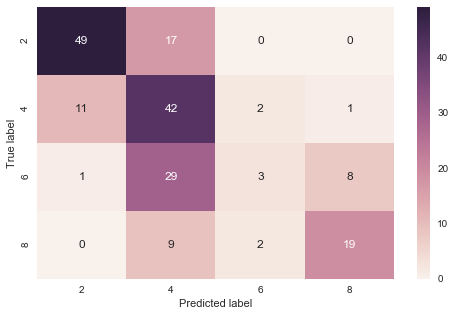

In [20]:
#Confusion Matrix

cm = confusion_matrix(Y_test, best_model.predict(X_test))

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['2','4','6','8'], 
                     columns = ['2','4','6','8'])

plt.figure(figsize=(8,5))
sns.heatmap(cm_df, annot=True, fmt="d")
#plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [21]:
'''
time1 = time.time()

from sklearn.utils import class_weight
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

class_weight = class_weight.compute_class_weight('balanced', np.unique(Y_train), Y_train)


model = Sequential()
model.add(Dense(5000, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.1))
model.add(Dense(600, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(y_train.shape[1], activation='sigmoid'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy',
              optimizer=sgd, 
              metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=10, batch_size=100, class_weight=class_weight, use_multiprocessing=True)

preds = model.predict(X_test)
preds[preds>=0.5] = 1
preds[preds<0.5] = 0

print time1-time.time()
'''

"\ntime1 = time.time()\n\nfrom sklearn.utils import class_weight\nfrom keras.models import Sequential\nfrom keras.layers import Dense, Dropout, Activation\nfrom keras.optimizers import SGD\n\nclass_weight = class_weight.compute_class_weight('balanced', np.unique(Y_train), Y_train)\n\n\nmodel = Sequential()\nmodel.add(Dense(5000, activation='relu', input_dim=X_train.shape[1]))\nmodel.add(Dropout(0.1))\nmodel.add(Dense(600, activation='relu'))\nmodel.add(Dropout(0.1))\nmodel.add(Dense(y_train.shape[1], activation='sigmoid'))\n\nsgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)\nmodel.compile(loss='binary_crossentropy',\n              optimizer=sgd, \n              metrics=['accuracy'])\n\nmodel.fit(X_train, Y_train, epochs=10, batch_size=100, class_weight=class_weight, use_multiprocessing=True)\n\npreds = model.predict(X_test)\npreds[preds>=0.5] = 1\npreds[preds<0.5] = 0\n\nprint time1-time.time()\n"